In [61]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Importing the dataset

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
# Only considering those columns which are of use.

df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Train Test Split

It's a good practice to do train test split before standardization.

In [64]:
# In this step, first we are importing 'train_test_split' from 'sklearn.model_selection'
# Then, we are spliting our data into two parts 'train (70% of data)' and 'test (30% of data)'

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], 
                                                    test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## StandardScaler

In [65]:
# In this step, first we have train our object 'scaler' by giving it 'X_train'
# Then, we are scaling 'X_train' and 'X_test' by scaler.transform

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
# 'X_train' before scaling

X_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [67]:
# 'X_train_scaled' is a numpy array, we have to convert it into dataframe
# 'X_train_scaled' after scaling (notice the difference)

X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [68]:
# As we have 'X_train_scaled' and 'X_test_scaled' in numpy arrays, in this step we are converting them in dataframe using Pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [69]:
# 'X_train_scaled' is not anymore a numpy array, now 'X_train_scaled' is converted into datframe

X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [70]:
# Info regarding our 'X_train', first we'll round off it to the 1 value.
# Here, we have to notice 4 values mean, standard deviation, minimum value and maximum value (remember: before scaling)

np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [71]:
# Info regarding our 'X_train_scaled', first we'll round off it to the 1 value.
# Here, we have to notice 4 values mean, standard deviation, minimum value and maximum value (remember: after scaling)


np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

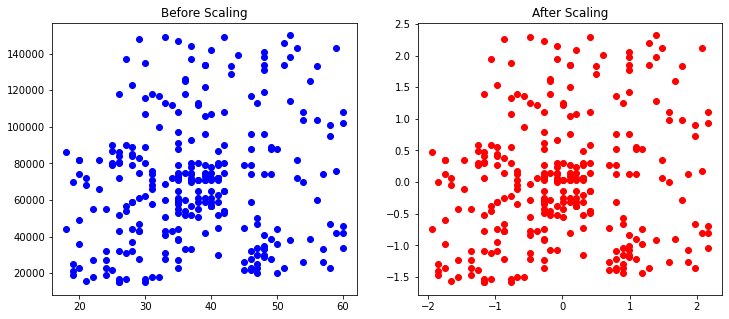

In [72]:
# Graphical illustration of 'X_train' and 'X_train_scaled', 
# Points are almost identical in both graphs, but the values of scale in both graphs have so much difference.
# Now, the data points are mean centered, and got restricted because of standard deviation.


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], color = 'blue')
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

plt.show()

## Importance of Scaling

Scaling improve the accurracy of algorithms like K-mean, K nearest neighbor, Gradient Descent.
But for some algorithms like decision tree, random forest, XG boost; it doesn't make any effect on their accuracy.


In this step, we will verify with Logistic Regression and Decision Tree algorithm

In [73]:
# In this step, here we will check the impact of scaling on Logistic Regression algorithm.

from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [75]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [76]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
# We can notice here the impact of scaling on data

print('Accuracy of actual data :', accuracy_score(y_test, y_pred)*100)
print('Accuracy of scaled data :', accuracy_score(y_test, y_pred_scaled)*100)

Accuracy of actual data : 65.83333333333333
Accuracy of scaled data : 86.66666666666667


In [79]:
# In this step, here we will check the impact of scaling on Decision tree algorithm.

from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [81]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [82]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [83]:
# Here, we can notice that accuracy of algorithm decreased.

print('Accuracy of actual data :', accuracy_score(y_test, y_pred)*100)
print('Accuracy of scaled data :', accuracy_score(y_test, y_pred_scaled)*100)

Accuracy of actual data : 87.5
Accuracy of scaled data : 87.5


## Effect of Outlier


In this dataset, we will add outliers to check what happens to outliers when we perform scaling

In [87]:
# We are adding outliers in actual dataset

df = df.append(pd.DataFrame({'Age':[3,92,95],'EstimatedSalary':[800,500000,350000],'Purchased':[0,1,0]}),ignore_index=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_5876\2961804389.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[3,92,95],'EstimatedSalary':[800,500000,350000],'Purchased':[0,1,0]}),ignore_index=True)


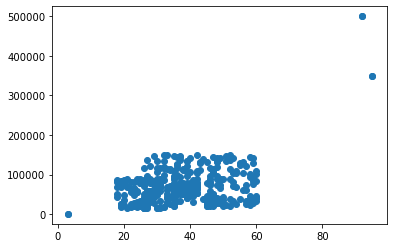

In [88]:
# As we can notice the three outliers which we added in our dataset

plt.scatter(df['Age'], df['EstimatedSalary'])

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'],
                                                   test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
# As we have 'X_train_scaled' and 'X_test_scaled' in numpy arrays, in this step we are converting them in dataframe using Pandas

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

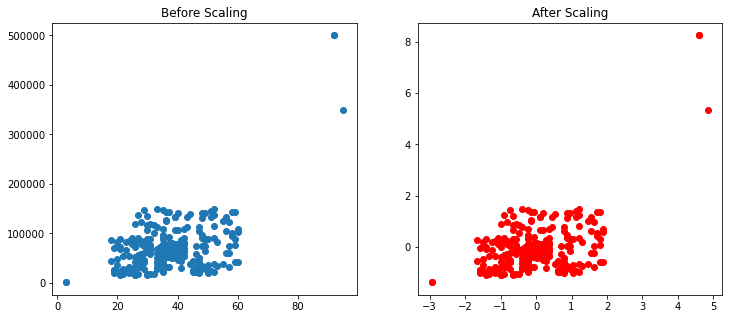

In [97]:
# Here, we can notice that outliers are present at same position before and after scaling. 
# It means scaling doesnot make any effect on outliers.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()